In [7]:
import NRB_Forex
import re
from datetime import datetime

def fetch_forex_data(date):
    forex_data = NRB_Forex.get_forex_rates(date)
    if forex_data:
        return forex_data
    else:
        print("Failed to fetch FOREX data for", date)
        return None

# Todays Date
today_date = datetime.now().strftime("%Y-%m-%d")
today_forex_data = fetch_forex_data(today_date)
print("Today's FOREX data:", today_forex_data)

# Past Date
past_date_input = input("Enter the date (YYYY-MM-DD) for past FOREX data: ")
past_dates_extracted = re.findall(r'\b\d{4}-\d{2}-\d{2}\b', past_date_input)
if past_dates_extracted:
    past_date = past_dates_extracted[0]
    past_forex_data = fetch_forex_data(past_date)
    print("Past FOREX data:", past_forex_data)
else:
    print("Invalid date format. Please enter date in YYYY-MM-DD format.")


Today's FOREX data: {'status': {'code': 200}, 'errors': {'validation': None}, 'params': {'date': None, 'from': '2024-06-02', 'to': '2024-06-02', 'post_type': None, 'per_page': '1', 'page': '1', 'slug': None, 'q': None}, 'data': {'payload': [{'date': '2024-06-02', 'published_on': '2024-06-02 00:00:55', 'modified_on': '2024-05-31 17:23:23', 'rates': [{'currency': {'iso3': 'INR', 'name': 'Indian Rupee', 'unit': 100}, 'buy': '160.00', 'sell': '160.15'}, {'currency': {'iso3': 'USD', 'name': 'U.S. Dollar', 'unit': 1}, 'buy': '133.25', 'sell': '133.85'}, {'currency': {'iso3': 'EUR', 'name': 'European Euro', 'unit': 1}, 'buy': '144.62', 'sell': '145.27'}, {'currency': {'iso3': 'GBP', 'name': 'UK Pound Sterling', 'unit': 1}, 'buy': '169.52', 'sell': '170.28'}, {'currency': {'iso3': 'CHF', 'name': 'Swiss Franc', 'unit': 1}, 'buy': '147.21', 'sell': '147.88'}, {'currency': {'iso3': 'AUD', 'name': 'Australian Dollar', 'unit': 1}, 'buy': '88.66', 'sell': '89.06'}, {'currency': {'iso3': 'CAD', 'name

In [8]:
import re

# Convert the forex data dictionaries to strings

today_forex_str = str(today_forex_data)
past_forex_str = str(past_forex_data)


# Regex pattern to extract currency ISO code, name, and unit
pattern = r"'iso3':\s*'(\w+)'.*?'name':\s*'([^']*)'.*?'unit':\s*([^,}]+)"


# Find currency ISO code, name, and unit in today's forex data
pattern_data_today = re.findall(pattern, today_forex_str)

# Find currency ISO code, name, and unit in past forex data
pattern_data_past = re.findall(pattern, past_forex_str)


def extract_currency_data(forex_data, currency_iso):
    currency_data = None
    for payload in forex_data['data']['payload']:
        for rate in payload['rates']:
            if rate['currency']['iso3'] == currency_iso:
                currency_data = rate
                break
        if currency_data:
            break
    return currency_data


currencies_data = [currency[0] for currency in pattern_data_past]

user_input = input("Which Currency?")

user_input_tokens = user_input.split()
upper_user_input_tokens = [token.upper() for token in user_input_tokens]

currency = list(set(upper_user_input_tokens) & set(currencies_data))

if currency:
    today_currency_data = extract_currency_data(today_forex_data, currency[0])
    past_currency_data = extract_currency_data(past_forex_data, currency[0])
    
    if today_currency_data and past_currency_data:
        print(f"{currency[0]} ({pattern_data_today[currencies_data.index(currency[0])][1]}) Data:")
        print("Today's:")
        print("Buy:", today_currency_data['buy'])
        print("Sell:", today_currency_data['sell'])
        print("Unit:", pattern_data_today[currencies_data.index(currency[0])][2])
        print("Past:")
        print("Buy:", past_currency_data['buy'])
        print("Sell:", past_currency_data['sell'])
        print("Unit:", pattern_data_past[currencies_data.index(currency[0])][2])
    else:
        print(f"{currency[0]} data not found.")
else:
    print("Currency not found in the available data.")


USD (U.S. Dollar) Data:
Today's:
Buy: 133.25
Sell: 133.85
Unit: 1
Past:
Buy: 113.92
Sell: 114.52
Unit: 1


In [9]:
def calculate_unit_price(buy, sell, unit):
    unit_buy = float(buy) / unit
    unit_sell = float(sell) / unit
    return unit_buy, unit_sell

currency = list(set(upper_user_input_tokens) & set(currencies_data))

if currency:
    today_currency_data = extract_currency_data(today_forex_data, currency[0])
    past_currency_data = extract_currency_data(past_forex_data, currency[0])
    
    if today_currency_data and past_currency_data:
        today_unit = int(pattern_data_today[currencies_data.index(currency[0])][2])
        past_unit = int(pattern_data_past[currencies_data.index(currency[0])][2])

        today_unit_buy, today_unit_sell = calculate_unit_price(today_currency_data['buy'], today_currency_data['sell'], today_unit)
        past_unit_buy, past_unit_sell = calculate_unit_price(past_currency_data['buy'], past_currency_data['sell'], past_unit)

        user_input_amount = 200

        today_user_buy = user_input_amount * today_unit_buy
        today_user_sell = user_input_amount * today_unit_sell
        past_user_buy = user_input_amount * past_unit_buy
        past_user_sell = user_input_amount * past_unit_sell

        print("Today's Data:")
        print(f"Today Rate {currency[0]} (BUY) for {user_input_amount}:", today_user_buy)
        print(f"Today Rate {currency[0]} (Sell) for {user_input_amount}:", today_user_sell)

        print("\nPast Data:")
        print(f"Past Rate (BUY) for {user_input_amount} :", past_user_buy)
        print(f"Past Rate (Sell) for {user_input_amount} :", past_user_sell)
    else:
        print(f"{currency[0]} data not found.")
else:
    print("Currency not found in the available data.")


Today's Data:
Today Rate USD (BUY) for 200: 26650.0
Today Rate USD (Sell) for 200: 26770.0

Past Data:
Past Rate (BUY) for 200 : 22784.0
Past Rate (Sell) for 200 : 22904.0


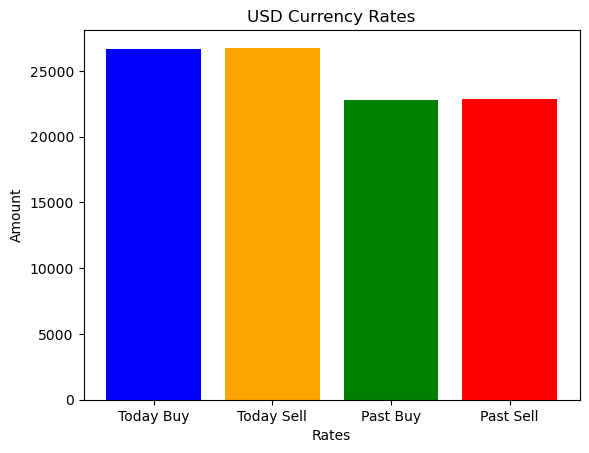

In [11]:
# Plotting
import matplotlib.pyplot as plt
labels = ['Today Buy', 'Today Sell', 'Past Buy', 'Past Sell']
values = [today_user_buy, today_user_sell, past_user_buy, past_user_sell]

plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Rates')
plt.ylabel('Amount')
plt.title(f'{currency[0]} Currency Rates')
plt.show()

In [10]:
# Calculate percentage increase or decrease for buying
buy_increase = ((today_user_buy - past_user_buy) / past_user_buy) * 100
buy_decrease = ((past_user_buy - today_user_buy) / past_user_buy) * 100

# Calculate percentage increase or decrease for selling
sell_increase = ((today_user_sell - past_user_sell) / past_user_sell) * 100
sell_decrease = ((past_user_sell - today_user_sell) / past_user_sell) * 100

# Display results
print("\nPercentage Change:")
if today_user_buy > past_user_buy:
    print(f"Buy rate increased by: {buy_increase:.2f}%")
else:
    print(f"Buy rate decreased by: {buy_decrease:.2f}%")

if today_user_sell > past_user_sell:
    print(f"Sell rate increased by: {sell_increase:.2f}%")
else:
    print(f"Sell rate decreased by: {sell_decrease:.2f}%")



Percentage Change:
Buy rate increased by: 16.97%
Sell rate increased by: 16.88%


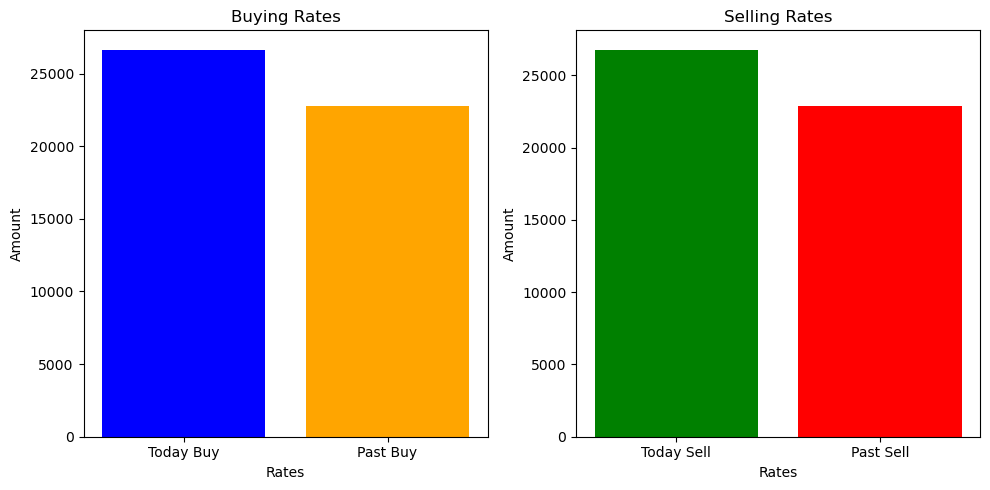

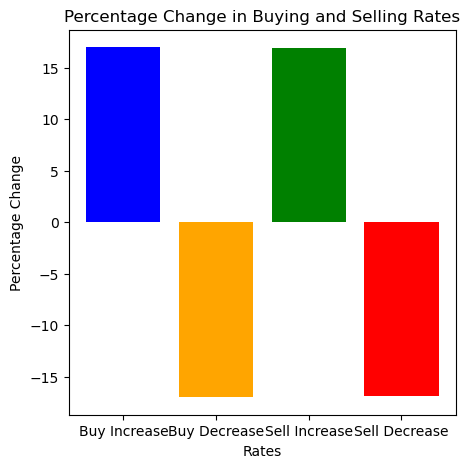

In [18]:

# Plotting
plt.figure(figsize=(10, 5))

# Plotting buying rates
plt.subplot(1, 2, 1)
plt.bar(['Today Buy', 'Past Buy'], [today_user_buy, past_user_buy], color=['blue', 'orange'])
plt.xlabel('Rates')
plt.ylabel('Amount')
plt.title('Buying Rates')

# Plotting selling rates
plt.subplot(1, 2, 2)
plt.bar(['Today Sell', 'Past Sell'], [today_user_sell, past_user_sell], color=['green', 'red'])
plt.xlabel('Rates')
plt.ylabel('Amount')
plt.title('Selling Rates')

plt.tight_layout()
plt.show()

# Plotting percentage change
plt.figure(figsize=(5, 5))
labels = ['Buy Increase', 'Buy Decrease', 'Sell Increase', 'Sell Decrease']
values = [buy_increase, buy_decrease, sell_increase, sell_decrease]
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Rates')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Buying and Selling Rates')
plt.show()